In [1]:
import sys
sys.path += [".."]

import smbh
import numpy as np
from scipy.optimize import curve_fit

from glob import glob

import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

In [2]:
def buildGrid(data, speeds):
    n = len(data[0])
    m = len(speeds)
    grid = np.zeros((n, m, 2))
    
    for i in range(m):
        grid[:, i] = data[i][:, 1:]
        
    grid[:, :, 0] *= 1000
    return grid

def getValidOnly(x, y):
    x = x.copy()
    y = y.copy()
    p = np.where(x > 0)[0]
    return x[p], y[p]

def plotRTvsSF(grid, s = 25, label_every = 10):
    global SPEEDS, FRACTIONS
    colors = [smbh.rgbToHex(color) for color in smbh.getColors(len(SPEEDS))]
    fig, ax = plt.subplots(figsize = (8, 4.5))

    for (i, v) in enumerate(SPEEDS):
        ts = grid[:, i, 0]
        ts, fs = getValidOnly(ts, FRACTIONS)
        c = colors[i]
        ax.plot(fs, ts, lw = 1, c = c)
        if i % label_every == 0:
            ax.plot(fs, ts, lw = 0.5, c = c)
            ax.scatter(fs, ts, s = s, alpha = 1, label = "$V_0 = %d$ kpcGyr$^{-1}$" % v, c = c)

    ax.set_xlabel("Stellar fraction")
    ax.set_ylabel("Return time (Myr)")
    ax.set_xlim(fs[0], fs[-1])
    ax.set_yscale("log")
    ax.legend(loc = 'upper center', bbox_to_anchor = (0.5, 1.1),
              ncol = 4, fancybox = True, shadow = True)
    ax.grid()

    fig.tight_layout()
    return fig, ax

In [3]:
files_s = sorted(glob("s*_resume.dat"))[::-1]
files_t = sorted(glob("t*_resume.dat"))[::-1]

In [4]:
data_s = [np.genfromtxt(file, skip_header = 1) for file in files_s]
data_t = [np.genfromtxt(file, skip_header = 1) for file in files_t]

SPEEDS = np.array([int(file[1:3]) for file in files_s])
FRACTIONS = data_s[0][:, 0]

In [5]:
grid_s = buildGrid(data_s, SPEEDS)
grid_t = buildGrid(data_t, SPEEDS)

# Symmetric

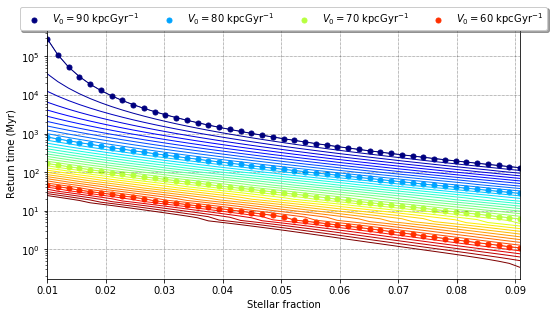

In [6]:
fig, ax = plotRTvsSF(grid_s, label_every = 10)

fig.savefig("returntimes_stellar_speed.png", dpi = 300)

# Triaxial

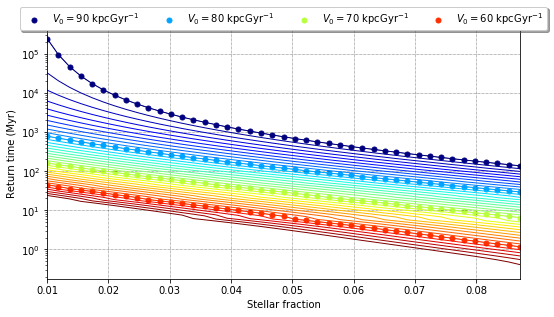

In [7]:
fig, ax = plotRTvsSF(grid_t)
fig.savefig("returntimes_stellar_speed.png", dpi = 300)

# Comparison

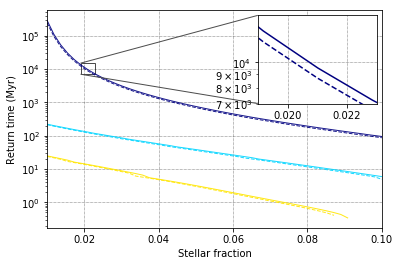

In [9]:
fig, ax = plt.subplots()

indexes = [0, len(SPEEDS) // 2, -1]
colors = smbh.getColors(len(indexes) * 1.4)

axins = smbh.zoomed_inset_axes(ax, 8, loc = 1) # zoom-factor: 2.5, location: upper-left

for (i, j) in enumerate(indexes):
    rt_s = grid_s[:, j, 0]
    rt_s, sf_s = getValidOnly(rt_s, FRACTIONS)
    rt_t = grid_t[:, j, 0].T
    rt_t, sf_t = getValidOnly(rt_t, FRACTIONS)
    
    lw = 1
    alpha = 0.9
    c = colors[i]
    
    ax.plot(sf_s, rt_s, color = c, lw = lw, alpha = alpha)
    ax.plot(sf_t, rt_t, '--', color = c, lw = lw, alpha = alpha)

    if i == 0:
        axins.plot(sf_s, rt_s, color = c)
        axins.plot(sf_t, rt_t, '--', color = c)
        
axins.set_xlim(0.019, 0.023) # apply the x-limits
axins.set_ylim(7e3, 1.5e4) # apply the y-limits
axins.set_yscale('log')
axins.grid()

smbh.mark_inset(ax, axins, loc1 = 2, loc2 = 3, fc = "none", ec = "0.3")
ax.set_yscale('log')

ax.set_xlim(FRACTIONS.min(), FRACTIONS.max())

ax.set_xlabel('Stellar fraction')
ax.set_ylabel('Return time (Myr)')
ax.grid()
    

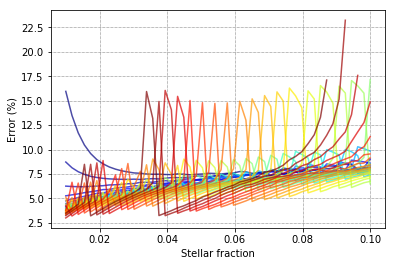

In [11]:
fig, ax = plt.subplots()

colors = smbh.getColors(len(SPEEDS))

for i in range(len(SPEEDS)):
    pos = np.where((data_s[i][:, 1] * data_t[i][:, 1] > 0) & (data_s[i][:, 1] > 0))[0]    
    e = 100 * abs(data_s[i] - data_t[i]) / data_s[i]
    e = e[pos, 1:]
    ax.plot(data_s[i][pos, 0], e[:, 0], '-', color = colors[i], alpha = 0.7)
    
ax.set_xlabel('Stellar fraction')
ax.set_ylabel('Error (%)')

# ax.set_yscale('log')
ax.grid()

In [ ]:
fig, ax = plt.subplots(figsize = (8, 4.5))

for i in range(len(files)):
    v = speeds[i]
    fs, ts, ms = data[i].T
    ts = ts * 1000
    ts, ms = getValidOnly(ts, ms)
    c = colors[i]
    ax.plot(ts, ms, lw = 0.5, c = c)
    if i % label_every == 0:
        ax.scatter(ts, ms, s = 25, alpha = 0.7, label = "$V_0 = %d$ kpcGyr$^{-1}$" % v, c = c)
    else:
        ax.scatter(ts, ms, s = 25, alpha = 0.7, c = c)
ax.set_ylabel("Black Hole Mass ($10^5 M_\odot$)")
ax.set_xlabel("Return Time (Myr)")

ax.set_xscale("log")
ax.legend(fontsize = 8)
# ax.legend(loc = 'upper center', bbox_to_anchor = (0.5, 1.22),
#           ncol = 4, fancybox = True, shadow = True)
ax.grid()

fig.tight_layout()
fig.savefig("returntimes_mass.png", dpi = 300)

In [ ]:
fig, ax = plt.subplots(figsize = (8, 4.5))

for i in range(len(files)):
    v = speeds[i]
    fs, ts, ms = data[i].T
    ts = ts * 1000
    _, fs = getValidOnly(ts, fs)
    _, ms = getValidOnly(ts, ms)
    c = colors[i]
    ax.plot(fs, ms, lw = 0.5, c = c)
    if i % label_every == 0:
        ax.scatter(fs, ms, s = 25, alpha = 0.7, label = "$V_0 = %d$ kpcGyr$^{-1}$" % v, c = c)
    else:
        ax.scatter(fs, ms, s = 25, alpha = 0.7, c = c)
    
ax.set_ylabel("Black Hole Mass ($10^5 M_\odot$)")
ax.set_xlabel("Stellar fraction")

ax.legend(loc = 'upper center', bbox_to_anchor = (0.5, 1.22),
          ncol = 4, fancybox = True, shadow = True)
ax.grid()

ax.set_xlim(0.022, 0.1)

fig.tight_layout()
# fig.savefig("returntimes_stellar_speed.png", dpi = 300)

In [ ]:
def filterCeroDerivative(x, y):
    x = x.copy()
    y = y.copy()
    d = np.where(np.diff(y) != 0)[0][0] + 1
    if(d > 0):
        x = x[d:]
        y = y[d:]

    ceros = (y != 0)
    x = x[ceros]
    y = y[ceros]
    return x, y

In [ ]:
def function1(x, a, b):
    return a * x + b # linear

def function2(x, a, b, c):
    return a * np.exp(-b * x) + c

def function3(x, a, b, c, d):
    return a * np.exp(-b * x) + c * x + d

fig, ax = plt.subplots(figsize = (8, 4.5))

colors = smbh.getColors(2)

funcs = [function2, function3]
labels = ['$f(x) = a e^{-bx} + c$', '$f(x) = a e^{-bx} + cx + d$']

fs, ts, ms = data_s[0].T
fs, ts = filterCeroDerivative(fs, ts * 1000)

ax.scatter(fs, ts, color = colors[-1], alpha = 0.6)

ys = np.log10(ts)
for (c, func, label) in zip(colors, funcs, labels):
    popt, pcov = curve_fit(func, fs, ys)
    y = func(fs, *popt)
    ax.plot(fs, 10 ** y, '--', lw = 1, color = c, label = label)

ax.set_xlabel('Stellar fraction')
ax.set_xlim(fs.min(), fs.max())
ax.set_ylabel("Return time (Myr)")
ax.set_yscale('log')
ax.legend()
ax.grid()

In [ ]:
def plotSpeedvsRT(speeds, data):
    fig, ax = plt.subplots(figsize = (8, 4.5))

    colors = smbh.getColors(len(data[0]))
    for k in range(len(data[0])):
        ts = np.array([d[k, 1] for d in data]) * 1000
        ts, v = getValidOnly(ts, speeds)
        ax.plot(v, ts, 'o', alpha = 0.9, c = colors[k])

    ax.set_yscale('log')
    ax.set_xlabel('Initial speed (kpc/Gyr)')
    ax.set_ylabel('Return time (Myr)')
    ax.grid()
    return fig, ax

In [ ]:
plotSpeedvsRT(speeds_s, data_s)

In [ ]:
coeffs = np.zeros((len(files_s), 4))
errors = np.zeros_like(coeffs)

b1 = [0, 25, -100, 0]
b2 = [100, np.inf, 0, 10]

bounds = (b1, b2)

colors = smbh.getColors(len(files_s))

for i in range(0, len(files_s), 5):
    fs, ts, ms = data_s[i].T
    ts, fs = getValidOnly(ts, fs)
    fs, ts = filterCeroDerivative(fs, ts)
    ts = ts * 1000
    ys = np.log10(ts)
    
    popt, pcov = curve_fit(function3, fs, ys, maxfev = int(1e5), bounds = bounds)
    coeffs[i] = popt
    y = func(fs, *popt)
    plt.plot(fs, 10 ** y, '--', lw = 1, color = colors[i])
    plt.scatter(fs, 10 ** ys, color = colors[i], alpha = 0.6)
    
plt.yscale('log')

In [ ]:
for i in range(4):
    plt.scatter(speeds_s, coeffs[:, i], label = chr(ord('A') + i))
# plt.yscale('log')

plt.legend()